In [1]:
import torch
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"

df = pd.read_csv(url, header=None)
print(df.head())

   0    1   2   3    4     5      6   7  8
0  6  148  72  35    0  33.6  0.627  50  1
1  1   85  66  29    0  26.6  0.351  31  0
2  8  183  64   0    0  23.3  0.672  32  1
3  1   89  66  23   94  28.1  0.167  21  0
4  0  137  40  35  168  43.1  2.288  33  1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       768 non-null    int64  
 1   1       768 non-null    int64  
 2   2       768 non-null    int64  
 3   3       768 non-null    int64  
 4   4       768 non-null    int64  
 5   5       768 non-null    float64
 6   6       768 non-null    float64
 7   7       768 non-null    int64  
 8   8       768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
for col in df.columns:
    print(col, " : ", df[col].nunique())

0  :  17
1  :  136
2  :  47
3  :  51
4  :  186
5  :  248
6  :  517
7  :  52
8  :  2


In [4]:
df.describe()

,0,1,2,3,4,5,6,7,8
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


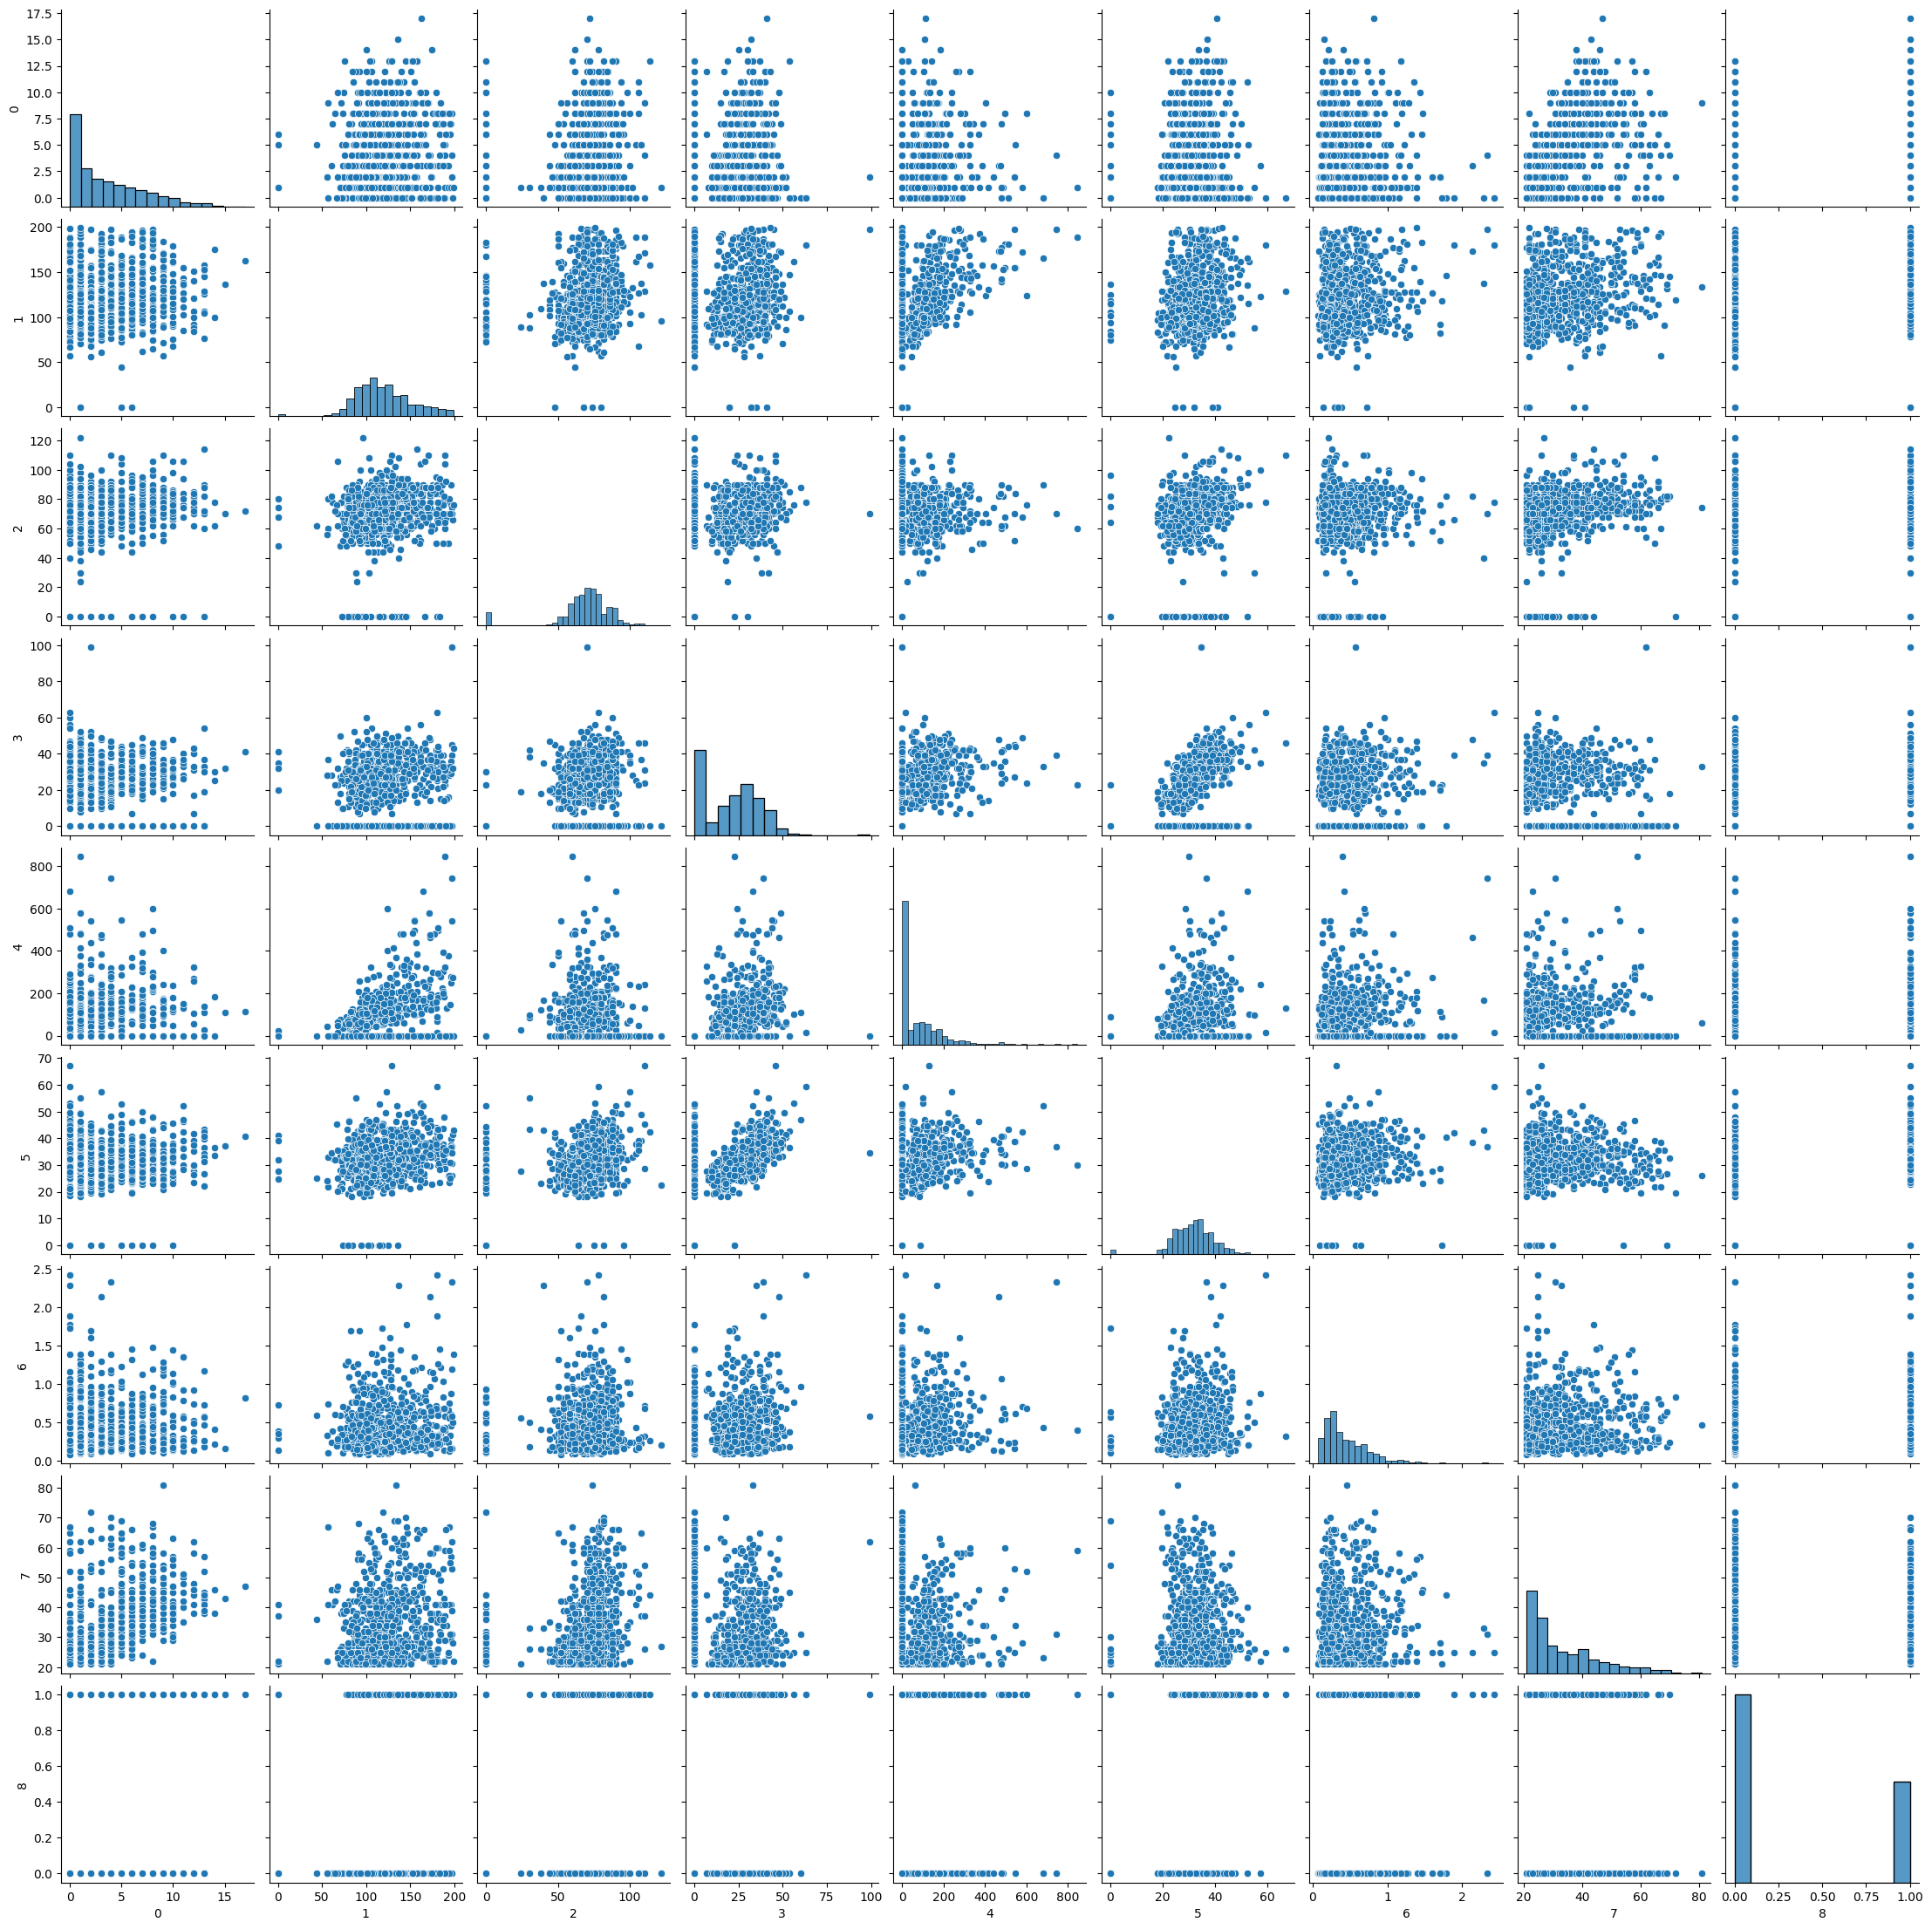

In [5]:
sns.pairplot(df)

In [6]:
df.corr()

,0,1,2,3,4,5,6,7,8
0,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
1,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
2,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
3,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
4,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
5,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
6,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
7,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
8,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [7]:
X = df.drop(8, axis=1)
X.head()

y = df[8]
y.head()

0    1
1    0
2    1
3    0
4    1
Name: 8, dtype: int64

In [8]:
## Dividing the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((614, 8), (614,), (154, 8), (154,))

In [9]:
print(X_train.head())

     0    1   2   3    4     5      6   7
255  1  113  64  35    0  33.6  0.543  21
661  1  199  76  43    0  42.9  1.394  22
650  1   91  54  25  100  25.2  0.234  23
713  0  134  58  20  291  26.4  0.352  21
80   3  113  44  13    0  22.4  0.140  22


In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train[:5])

[[-0.82534239 -0.19466124 -0.24841487  0.90917376 -0.69873352  0.21202993
   0.2111441  -1.01090337]
 [-0.82534239  2.50108803  0.37605485  1.41197284 -0.69873352  1.37173614
   2.73807377 -0.92668428]
 [-0.82534239 -0.88427151 -0.7688063   0.2806749   0.16638794 -0.83544665
  -0.7063897  -0.84246519]
 [-1.13080365  0.46360312 -0.56064973 -0.03357453  1.81876992 -0.68580714
  -0.35600463 -1.01090337]
 [-0.21441987 -0.19466124 -1.28919774 -0.47352373 -0.69873352 -1.18460551
  -0.98551002 -0.92668428]]


Hyper parameters

- Depth optimized [number of layers]
- Number of neurons in the hidden layer
- Dropout
- Weight inititialization

Typically, dropout is applied after the non-linear activation function (a). However, when using rectified linear units (ReLUs), it might make sense to apply dropout before the non-linear activation (b) for reasons of computational efficiency depending on the particular code implementation.

In [11]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.classifier = nn.Sequential(
            nn.Linear(8, 20),
            nn.Dropout(0.2),
            nn.ReLU(),
            nn.Linear(20, 40),
            nn.Sigmoid(),
            nn.Linear(40, 2)
        )
    
    def forward(self, x):
        return self.classifier(x)

In [12]:
X_train_tensor = torch.from_numpy(X_train).float()
X_test_tensor = torch.from_numpy(X_test).float()

y_train = np.array(y_train)
y_train_tensor = torch.from_numpy(y_train).long()

y_test = np.array(y_test)
y_test_tensor = torch.from_numpy(y_test).long()

Epoch [10/600], Loss: 0.6948
Epoch [20/600], Loss: 0.6704
Epoch [30/600], Loss: 0.6520
Epoch [40/600], Loss: 0.6392
Epoch [50/600], Loss: 0.6293
Epoch [60/600], Loss: 0.6215
Epoch [70/600], Loss: 0.6159
Epoch [80/600], Loss: 0.6131
Epoch [90/600], Loss: 0.6105
Epoch [100/600], Loss: 0.6060
Epoch [110/600], Loss: 0.6046
Epoch [120/600], Loss: 0.6034
Epoch [130/600], Loss: 0.5999
Epoch [140/600], Loss: 0.5957
Epoch [150/600], Loss: 0.5943
Epoch [160/600], Loss: 0.5911
Epoch [170/600], Loss: 0.5880
Epoch [180/600], Loss: 0.5817
Epoch [190/600], Loss: 0.5808
Epoch [200/600], Loss: 0.5766
Epoch [210/600], Loss: 0.5714
Epoch [220/600], Loss: 0.5682
Epoch [230/600], Loss: 0.5662
Epoch [240/600], Loss: 0.5631
Epoch [250/600], Loss: 0.5519
Epoch [260/600], Loss: 0.5545
Epoch [270/600], Loss: 0.5486
Epoch [280/600], Loss: 0.5481
Epoch [290/600], Loss: 0.5430
Epoch [300/600], Loss: 0.5374
Epoch [310/600], Loss: 0.5296
Epoch [320/600], Loss: 0.5294
Epoch [330/600], Loss: 0.5246
Epoch [340/600], Lo

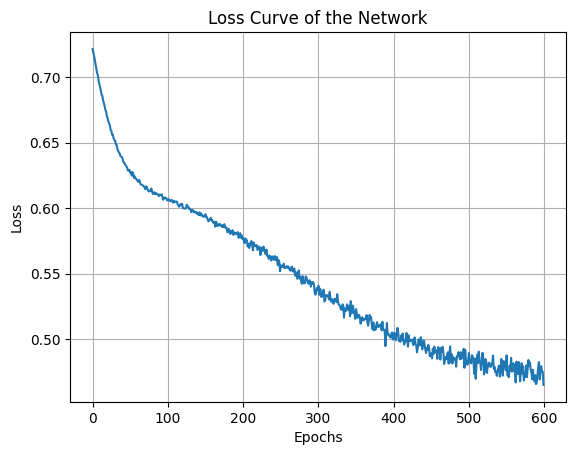

In [16]:
model = NeuralNetwork()

lr = 3e-4
epochs = 600

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(params=model.parameters(), lr=lr)

loss_after_each_epoch = []

for epoch in range(epochs):
    model.train()

    yhat = model(X_train_tensor)

    loss = loss_fn(yhat, y_train_tensor)
    loss.backward()

    optimizer.step()
    optimizer.zero_grad()

    loss_after_each_epoch.append(loss.item())

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')

plt.plot(range(epochs), loss_after_each_epoch)
plt.title('Loss Curve of the Network')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

In [17]:
import torch
from sklearn.metrics import accuracy_score

model.eval()

with torch.no_grad():
    yhat_test = model(X_test_tensor)
    
    # Convert logits to predicted class labels
    _, y_pred = torch.max(yhat_test, 1)
    
    # Convert predictions and true labels to numpy arrays for evaluation
    y_pred_np = y_pred.numpy()
    y_test_np = y_test_tensor.numpy()

    accuracy = accuracy_score(y_test_np, y_pred_np)
    print(f'Accuracy on the test set: {accuracy:.4f}')

Accuracy on the test set: 0.7792
